<a href="https://colab.research.google.com/github/WallaceSantana79/CursoMachineLearning/blob/main/TratamentoDeDadosDesbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados Desbalanceados

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

##Preparação dos Dados

In [75]:
base_census = pd.read_csv('census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [77]:
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

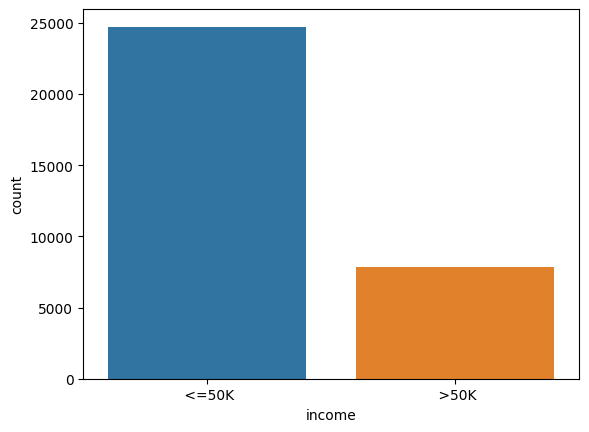

In [78]:
sns.countplot(x=base_census['income']);

In [79]:
X_census = base_census.iloc[:,0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [80]:
y_census = base_census.iloc[:,14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [82]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [83]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

##Subamostragem com Tomek Links

In [63]:
from imblearn.under_sampling import TomekLinks

In [64]:
tl = TomekLinks(sampling_strategy='all')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [65]:
X_under.shape, y_under.shape

((27759, 14), (27759,))

In [66]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [67]:
np.unique(y_under, return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  5440]))

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
X_census = onehotencorder.fit_transform(X_under).toarray()
X_census

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [69]:
X_census.shape

(27759, 108)

In [70]:
from sklearn.model_selection import train_test_split
X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((23595, 14), (4164, 14))

In [71]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=100)
random_forest_census.fit(X_census_treinamento_under,y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [72]:
from sklearn.metrics import accuracy_score
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under,previsoes)

0.8892891450528339

* 0.860079575596817 - Majority

* 0.8892891450528339 - All

##Sobreamostragem com SMOTE

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
X_census.shape

(32561, 14)

In [87]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [93]:
X_over.shape

(49440, 14)

In [89]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [90]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
X_census = onehotencorder.fit_transform(X_over).toarray()
X_census

array([[   0.        ,    0.        ,    0.        , ..., 2174.        ,
           0.        ,   40.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   13.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   40.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   47.01021286],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   40.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   52.40114196]])

In [94]:
from sklearn.model_selection import train_test_split
X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 14), (7416, 14))

In [95]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=100)
random_forest_census.fit(X_census_treinamento_over,y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [97]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over,previsoes)

0.9089805825242718

In [100]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

